1. [Tiered architecture](#Tiered-architecture)
2. [Django](#Django)
    1. [MVC](#MVC)
    2. [Coding style](#Coding-style)
    3. [Enviroment setup](#Enviroment-setup)
    3. [Project structure](#Project-structure)
    4. [Configuration](#Configuration)
    5. [Dependencies](#Dependencies)
    6. [URL dispatching](#URL-dispatching)

## Tiered architecture

* https://stackshare.io/instagram/instagram
* https://stackshare.io/disqus/disqus
* https://stackshare.io/pinterest/pinterest

Start point

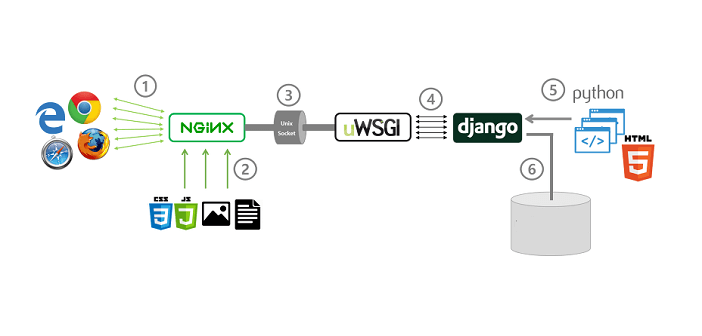

### References

* http://berb.github.io/diploma-thesis/original/033_archmodel.html
* https://www.insight-it.ru/highload/2012/arkhitektura-instagram/
* https://stackshare.io/stacks
* http://highload.guide/

### Summary

* Tiered acrchitecture is a current best practice

## Django

__Design philosophies__

* Loose coupling
* Less code
* Quick development
* DRY
* Explicit is better than implicit
* Consistency

#### MVC

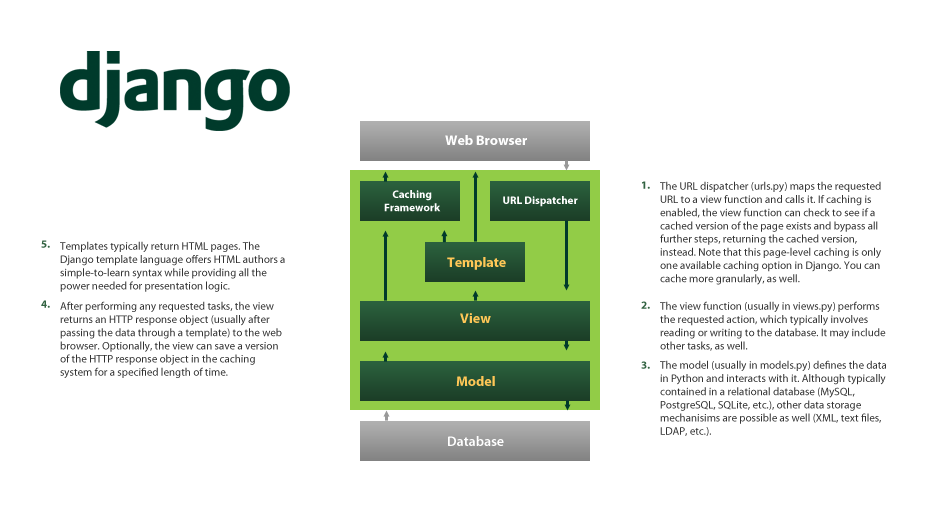

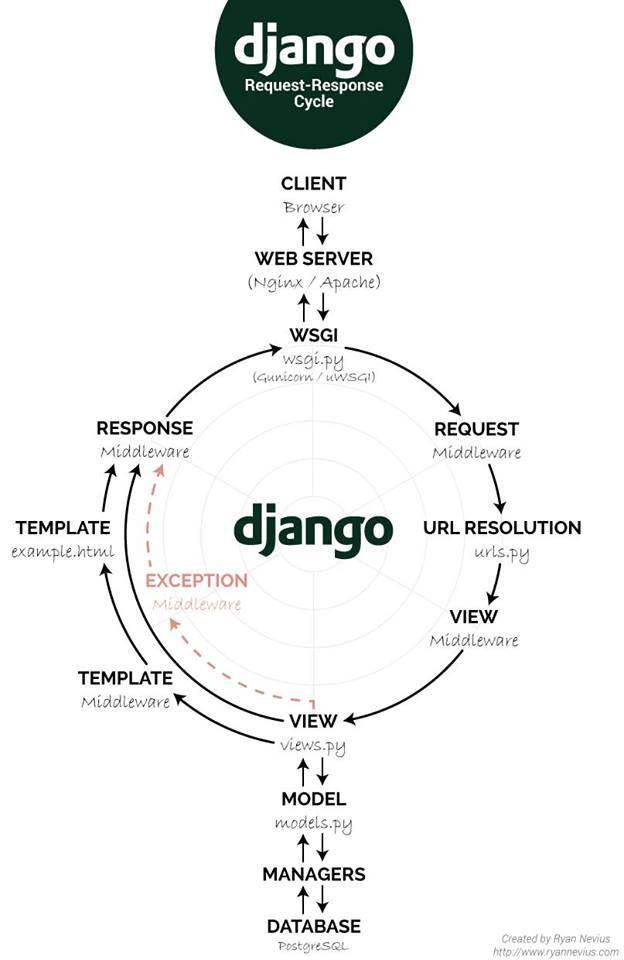

#### Coding style

* PEP8
    * Maximum line length
* Imports order
* Explicit relative imports

In [ ]:
from .models import Product
from .utils import hhh

In [ ]:
from models import Product

In [ ]:
# future
from __future__ import unicode_literals

# standard library
import json
from itertools import chain

# third-party
import bcrypt

# Django
from django.http import Http404
from django.http.response import (
    Http404, HttpResponse, HttpResponseNotAllowed, StreamingHttpResponse,    
)

# local Django
from .models import LogEntry

# try/except
try:
    import yaml
except ImportError:
    yaml = None

CONSTANT = 'foo'

In [ ]:
# banners/views.py
from django.views.generic import CreateView

from .models import Banner
from .forms import BannerForm
from core.views import AdMixin

class BannerCreateView(AdMixin, CreateView):
    model = Banner
    form_class = BannerForm

Use underscore in URL pattern names

In [ ]:
django < 1.1
patterns = [
    url(regex='^add/$',
        view=views.add_banner,
        name='add_banner'),
    ]

In [ ]:
django 2.+
from django.urls import path
from . import views

urlpatterns = [
    path('add/', views.add_banner, name="add_banner") without regex
    re_path(r'^add/$', views.add_banner, name="add_banner") with regex
]


#### Enviroment setup

* keep the gap between development and production small
    * example: dont use SQLite for dev and other DB for prod
* never rely on implicit existence of system-wide packages
    * declare all dependencies
    * use dependency isolation

In [ ]:
pip install virtualenvwrapper
export WORKON_HOME=~/Envs
source /usr/local/bin/virtualenvwrapper.sh


mkvirtualenv my_project
workon my_project

In [ ]:
1. create virtual env
2. pip install django
3. django-admin startproject myproject
4. cd myproject http://127.0.0.1:8000
optional
1.pip freeze > requirements.txt




#### Project structure

#### Configuration

In [ ]:
# local.py

from .base import *

DEBUG = True

EMAIL_BACKEND = 'django.core.mail.backends.console.EmailBackend'

DATABASES = {
    'default': {
        'ENGINE': 'django.db.backends.postgresql_psycopg2',
        'NAME': 'uber',
        'HOST': 'localhost',
    }
}

INSTALLED_APPS += ['debug_toolbar', ]

In [ ]:
pip install django-debug-toolbar

python manage.py migrate

In [ ]:
export DJANGO_SETTINGS_MODULE=mysite.settings
django-admin runserver

DJANGO_SETTINGS_MODULE=mysite.settings django-admin runserver

django-admin runserver --settings=mysite.settings

__Secrets__

In [ ]:
# settings/base.py
import os

# Normally you should not import ANYTHING from Django directly
# into your settings, but ImproperlyConfigured is an exception.
from django.core.exceptions import ImproperlyConfigured

def get_env_variable(var_name):
    """Get the environment variable or return exception."""
    try:
        return os.environ[var_name]
    except KeyError:
        error_msg = 'Set the {} environment variable'.format(var_name)
        raise ImproperlyConfigured(error_msg)


In [ ]:
# Top of settings/production.py
import os
SOME_SECRET_KEY = get_env_variable('SOME_SECRET_KEY')

In [ ]:
# settings/base.py
import json

from django.core.exceptions import ImproperlyConfigured

# JSON-based secrets module
with open('secrets.json') as f:
    secrets = json.loads(f.read())

def get_secret(setting, secrets=secrets):
    '''Get the secret variable or return explicit exception.'''
    try:
        return secrets[setting]
    except KeyError:
        error_msg = 'Set the {0} environment variable'.format(setting)
        raise ImproperlyConfigured(error_msg)

SECRET_KEY = get_secret('SECRET_KEY')

__Paths__

In [ ]:
# At the top of settings/base.py

from os.path import abspath, dirname, join

def root(*dirs):
    base_dir = join(dirname(__file__), '..', '..')
    return abspath(join(bas_dir, *dirs))


BASE_DIR = root()
MEDIA_ROOT = root('media')
STATIC_ROOT = root('static_root')
STATICFILES_DIRS = [root('static')]
TEMPLATES = [
    {
        'BACKEND': 'django.template.backends.django.DjangoTemplates',
        'DIRS': [root('templates')],
    },
]

#### Dependencies

In [ ]:
pip install -r requirements/local.txt

#### URL dispatching

* Django determines the root URLconf module to use. Ordinarily, this is the value of the ROOT_URLCONF setting
* Django loads that Python module and looks for the variable urlpatterns.
* Django runs through each URL pattern, in order, and stops at the first one that matches the requested URL.
* Once one of the regexes matches, Django imports and calls the given view, which is a simple Python function (or a class-based view). The view gets passed the following arguments:
    * An instance of HttpRequest.
    * If the matched regular expression returned no named groups, then the matches from the regular expression are provided as positional arguments.
    * The keyword arguments are made up of any named groups matched by the regular expression, overridden by any arguments specified in the optional kwargs argument to django.conf.urls.url().
* If no regex matches, or if an exception is raised during any point in this process, Django invokes an appropriate error-handling view. 

In [ ]:
# project urls.py

from django.contrib import admin
from django.urls import path, include

urlpatterns = [
    path('author-polls/', include('polls.urls', namespace='author-polls')),
    path('publisher-polls/', include('polls.urls', namespace='publisher-polls')),
    path('admin/', admin.site.urls),
]

In [ ]:
# polls/urls.py

from django.urls import path

from . import views

app_name = 'polls'

urlpatterns = [
    path('', views.IndexView.as_view(), name='index'),
    path('<int:pk>/', views.DetailView.as_view(), name='detail'),
]

In [ ]:
conda create -n myenv python=3.10
conda activate myenv

pip install django
django-admin startproject myproject

cd myproject
python manage.py runserver


pip install psycopg2
pip install mysqlclient


python manage.py startapp myapp




In [ ]:
FBV
from django.shortcuts import render
from .models import Product

def product_list(request):
    product = Product.objects.all()
    return render(request, 'product.html', {'products': products})




In [ ]:
CBV
from django.views.generic import ListView
from .models import Product

class ProductListView(ListView):
    model = Product
    template_name= 'product.html' 
    context_object_name = "products"


In [ ]:
FBV + CBV

from django.urls import path
from .views import ProductListView, contact

urlpatterns = [
    path('', ProductListView.as_view(), name='product_list'), CBV
    path('contact/', contact, name="contact")   FBV
]



### References

* https://docs.djangoproject.com/en/4.2/misc/design-philosophies/
* https://docs.djangoproject.com/en/4.2/internals/contributing/writing-code/coding-style/
* https://docs.djangoproject.com/en/4.2/internals/
* https://www.python.org/dev/peps/pep-0328/
* https://12factor.net/
* http://cookiecutter-django.readthedocs.io/en/latest/developing-locally-docker.html
* http://www.eidel.io/2017/07/10/dockerizing-django-uwsgi-postgres/
* https://github.com/pydanny/cookiecutter-django
* https://docs.djangoproject.com/en/4.2/topics/http/urls/
* http://klen.github.io/py-frameworks-bench/
* https://pypi.org/project/pydjantic/

### Summary

* Django follows MVC pattern
* Isolate your enviroment
* Split config
* Use enviroment variables
* Freeze dependencies